In [33]:
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

__Introduction__
In this project I seek to analyze the diffrences in labor market conditions, education, and demographics in Austria's smaller communities, i.e. villages. I seek to explore both how villages differ from Austrian towns and cities and variation and outliers among villages. To preform this analysis I will be using data from Statistics Austria, specifally data from the 2019 census aggregated to the community level. I will define villages as the municipalities in the bottom 25th percentile for total population amongst Austrian municipalities. Similarly I will define towns as municipalities in the middle 50th percentile and cities as the top 25th percentile.

Data source available here: https://www.statistik.at/fileadmin/pages/402/AEST_Gemeindeergebnisse_2012-2019.ods

In [34]:
# Read the CSV file into a DataFrame
AustriaCensus2019 = pd.read_csv('AustriaCensus2019.csv') 

# Give cols more clear names
AustriaCensus2019 = AustriaCensus2019.rename(columns={
    'Community Code': 'Code',
    'Bundesland, Politischer Bezirk, Gemeinde': 'District',
    'total population': 'Total_population',
    'Proportion of people\r\n under 15 years': 'Proportion_under_15',
    'Proportion of people\r\n 65 years and older': 'Proportion_65_and_older',
    'share of non-Austrian citizens': 'Share_non_Austrian_citizens',
    'employment rate\r\n of 15 to 64 year olds': 'Employment_rate_15_to_64',
    'unemployment rate\r\n (15 years and older)': 'Unemployment_rate_15_and_older',
    'Share of people with secondary education ': 'Share_secondary',
    'Share of people with tertiary education ': 'Share_tertiary',
    'Share of commuters in active employment': 'Share_commuters',
    'Number of private households': 'Number_private_households',
    'average household size': 'Average_household_size',
    ' Number of families ': 'Number_of_families',
    'Companies ': 'Number_of_companies',
    'Workplaces ': 'Number_of_workplaces',
    'Employees in the workplaces': 'Number_of_employees'
})

# Display the column names to see if it worked
print(AustriaCensus2019.columns)


Index(['Code', 'District', 'Total_population',
       'Proportion of people\n under 15 years',
       'Proportion of people\n 65 years and older',
       'Share_non_Austrian_citizens',
       'employment rate\n of 15 to 64 year olds',
       'unemployment rate\n (15 years and older)',
       'Share of people with secondary education',
       'Share of people with tertiary education', 'Share_commuters',
       'Number_private_households', 'Average_household_size',
       'Number of families', 'Companies', 'Workplaces', 'Number_of_employees'],
      dtype='object')


In [38]:
print(AustriaCensus2019.columns)

Index(['Code', 'District', 'Total_population',
       'Proportion of people\n under 15 years',
       'Proportion of people\n 65 years and older',
       'Share_non_Austrian_citizens',
       'employment rate\n of 15 to 64 year olds',
       'unemployment rate\n (15 years and older)',
       'Share of people with secondary education',
       'Share of people with tertiary education', 'Share_commuters',
       'Number_private_households', 'Average_household_size',
       'Number of families', 'Companies', 'Workplaces', 'Number_of_employees'],
      dtype='object')


In [57]:
# Clean the data to ensure that the variables are appropriately categorized

# Category
AustriaCensus2019['District'] = AustriaCensus2019['District'].astype('category')

# Fix column names with line breaks
AustriaCensus2019 = AustriaCensus2019.rename(columns={
    'Proportion of people\n under 15 years': 'Proportion_under_15',
    'Proportion of people\n 65 years and older': 'Proportion_65_and_older',
    'employment rate\n of 15 to 64 year olds': 'Employment_rate_15_to_64',
    'unemployment rate\n (15 years and older)': 'Unemployment_rate_15_and_older'
})

# Floats
columns_to_convert = [
    'Code', 'Proportion_under_15', 'Proportion_65_and_older',
    'Share_non_Austrian_citizens', 'Employment_rate_15_to_64',
    'Unemployment_rate_15_and_older'
]

# Convert to floats using .loc to avoid SettingWithCopyWarning
AustriaCensus2019.loc[:, columns_to_convert] = AustriaCensus2019[columns_to_convert].astype('float')

# Integers
AustriaCensus2019['Total_population'] = AustriaCensus2019['Total_population'].astype('int')

# Now let's look at our data types to see if this all worked
print(AustriaCensus2019.dtypes)


Code                                           int64
District                                    category
Total_population                               int32
Proportion_under_15                          float64
Proportion_65_and_older                      float64
Share_non_Austrian_citizens                  float64
Employment_rate_15_to_64                     float64
Unemployment_rate_15_and_older               float64
Share of people with secondary education     float64
Share of people with tertiary education      float64
Share_commuters                              float64
Number_private_households                      int64
Average_household_size                       float64
Number of families                             int64
Companies                                      int64
Workplaces                                     int64
Number_of_employees                            int64
Population_category                         category
dtype: object


In [58]:
# Finally to finish the cleaning stage of my analysis I will remove all adminstrative levels above the municipal level from the dataset
AustriaCensus2019 = AustriaCensus2019[AustriaCensus2019['Code'] >= 900]

In [59]:
# Now lets divde the population up so that we can analyze by municipality size
total_population_quartiles = pd.qcut(AustriaCensus2019['Total_population'], q=[0, 0.25, 0.75, .99, 1.0], labels=['village', 'town', 'city', 'large city'])
AustriaCensus2019['Population_category'] = total_population_quartiles.astype('category')

<Axes: ylabel='Total_population'>

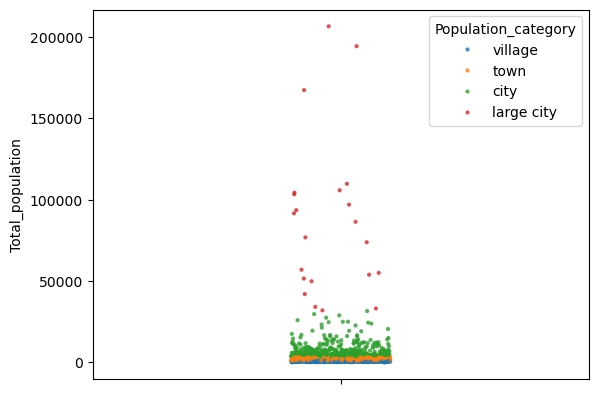

In [60]:
# lets get a quick visualization of this break down
sns.stripplot(y='Total_population', hue='Population_category', alpha=.8, size=3, data=AustriaCensus2019)

In [61]:
# Now I can inspect how villages, towns and cities differ by splitting them into three dataframes and looking at summary statistics
# Split into dataframes
VillageDF = AustriaCensus2019[AustriaCensus2019['Population_category'] == 'village'].copy()
TownDF = AustriaCensus2019[AustriaCensus2019['Population_category'] == 'town'].copy()
CityDF = AustriaCensus2019[AustriaCensus2019['Population_category'] == 'city'].copy()
LCityDF = AustriaCensus2019[AustriaCensus2019['Population_category'] == 'large city'].copy()



In [62]:
dfSummary(VillageDF, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Code[int64],Mean (sd) : 44456.1 (21407.8)min < med < max:10320.0 < 40920.0 < 80422.0IQR (CV) : 39216.5 (2.1),526 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACl0lEQVR4nO3cT4riQBSA8VcTlbRCggi68wIDs3DpIeawc4RZeAJv4E4QiZjuYIyZxTDQix7/pFJar/L99rED/dF5Vqra1HUtgO++vfoGgHv0Xn0D8Icx5k1EBhYfcarr+qOt+/mMUCEifyOdTCY/kyQZN/2Mw+GwN8b8chEroeKfQZIk4+Vy+ZGmafHoxVmWxavVarzb7QYiQqhwK03TYjqdvje8/K3Vm/mEUP/Dcl5zNqt1FaF+wXZeczmrdRWhfq3xvOZ6VusqQr3CYl5zNqt1FQv+UIFQoQKhQgVChQqEChUIFSoQKlQgVKgQ7IK/5bv65HK59Nu8H9gJMlTbd/VlWcZVVX0viuK3iDTdSYQWBRmqWO6t3Gw24/V6PTyfz5GLm8PjQg1VRJq/q9/v97yr9wxfpqACoUIFQoUKhAoVCBUqECpUIFSoQKhQ4eaCP+fb4YOroXK+Hb649ReV8+3wwl3v+l91vt1i7GCbXmC83ZRiM3awTS883oYqFmMH2/TC43OoItJs7GCbXnhYR4UKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCt6/mYIeVVX1RSQxxjS5/OreZUJFK/I875dl+WM+n0dRFD38b5Ru7V0mVLTidDr14jgeLhaLYjab7R+59p69y4SKVo1GIyd7l/kyBRUIFSoQKlRgRnXA5TJNVxFqy1wv09wS6oFIQm2Z62Waa0I+EEmojrhaprkh2AORTkO1nNW8fhT5LMQDkc5CtZ3VfH8U4bmchWozq4n4/yjCczmfUZvOar4/ivBcLPhDBUKFCoQKFQgVKhAqVCBUqECoUIFQocJdC/5ZlsWPfvDxeIxFRPI8j7fb7fCZ12v92VmWxVVV9cRuf0RP2+/rnvv9Axxfgie6xMEeAAAAAElFTkSuQmCC"">",0(0.0%)
2,District[category],1. Viktorsberg2. Großharras3. Herrnbaumgarten4. Niederleis5. Rabensburg6. Schrattenberg7. Unterstinkenbrunn8. Ottenthal9. Laab im Walde10. Altendorf11. other,1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)516 (98.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
3,Total_population[int32],Mean (sd) : 738.7 (264.3)min < med < max:42.0 < 769.0 < 1142.0IQR (CV) : 421.8 (2.8),406 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3cu47aQBSA4TMmi8wlthAJdDQp07mkyRvkYdOmSwEvQJEmFQ1CQsYIZ62AcYpkpS0WFt/Wc6z/a1dn7eIXGttjmyzLBLCd0/QJAPd41/QJoFrGmJ6IdAuOOyJyKXH4P1mWPZaYv4pQW8QY0xuPx189zxvlnU3T9CGO40/D4fCX4zinIsff7/dHY8x3EUkKjN+MnFDbpet53mg+nz/6vp8rlvV6PVqtVh+DIPg5nU7DvAfebDbvl8vll9ls9qHT6eQO9XA4hMaYb9diJdQW8n0/mUwmv/PMhGHYExEZDAa5Z5/mXdftB0GQ5A09iiJ3sViMdrtdV0QIFfUrGrqI9G79kat+qECoUIFQoQKhQgVChQpc9degwadD3uVyeSg4azVCrViTT4dOp5ObpunnJEl+iEiRW0TWItTqNfZ06P98/3w+d/LO2o5Qa9LU06G8M1pwMQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMCmlCtK7Clt7Z7QJhHqC8rsKW3zntAmEerLyu4pbeWe0CYR6g1l9pSiWq0NteR7S6wzLdPKUMusMUVYZ9qolaFKiTWmCOtMG7U1VBEptsYUYZ1pI274QwVChQqEChUIFSoQKlQgVKhg9e0pdjDhibWh

In [63]:
dfSummary(TownDF, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Code[int64],Mean (sd) : 42114.8 (18512.0)min < med < max:10301.0 < 40715.5 < 80423.0IQR (CV) : 30075.8 (2.3),"1,052 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmUlEQVR4nO3bQYriQBSA4VcTlaiQIILuvMDALFx6iDnsHGEWnsAbuBNEIqY7GGNmNziQ6dZUVZtX/t8+dkH/iFV5Zeq6FqDrvj17AcA9es9eQFcZY4YiMmj5+Lmu63eX63l1hNrAGDOcTqc/kySZtHn+eDwejDG/iNUdQm02SJJkslqt3tM0LR55MMuyeL1eT/b7/UBECNURQv1AmqbFbDZ7a/Ho0PliXhybKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCsFOT1kOPifX67Xvcj2wE2SotoPPZVnGVVV9L4rit4i0GfODY0GGKhaDzyIi2+12stlsRpfLJfKxOJ9CvUITaqgi0n7w+XA4qBx8DvkKTdChvqBgr9AQaoBCvELD8RRUIFSoQKhQgVChAqFCBUKFCoQKFTp9jmrxOpChksB0NlSb14EMlYSns6GKxetAzUMlaNblUEWk3etArUMlz1ZVVV9EEmNM24/wNn3V+VDxNfI875dl+WOxWERRFD08Ginid/qKUCEiIufzuRfH8Wi5XBbz+fzw6PO+p68IFf8Yj8dtJ69EPE5fcY4KFQgVKhAqVPj0N2qol8Wgy4ehhnxZDLp89o0a7GUx6HLX8VSIl8WgC5spqECoUMHrmynLIQdmSvGXt1BthxyYKcUtb6HaDjkwU4pb3odS2g45MFOKW2ymoAKhQgVChQqEChWY8PfA8vyYibMGhOqY7fkxE2fNCNUxm/NjJs7+j1A9sbgkx/lxAzZTUIFvVDjjcxNJqHDC9yaSUOGE700kocIpX5tINlNQgVChAqFCBUKFCndtprIsix/94NPpFIuI5Hke73a70Vc+r/VvZ1kWV1XVE7sLkT1t/6971vsH+7iMCut9d+QAAAAASUVORK5CYII="">",0(0.0%)
2,District[category],1. Weiler2. Enzenreith3. Aspangberg-St. Peter4. Aspang-Markt5. Wienerwald6. Münchendorf7. Laxenburg8. Hennersdorf9. Gießhübl10. Gaaden11. other,"1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1,042 (99.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_population[int32],Mean (sd) : 1938.0 (565.1)min < med < max:1143.0 < 1818.0 < 3189.0IQR (CV) : 860.0 (3.4),795 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACwklEQVR4nO3dvY7aQBRA4TuwIPMTW4gEOjcpI6VwSZM3yMOmTZcCXoAiTSoahIQMCGctjCHNEiXRBvAMJL7e89U7XheHtZmdsc3xeBSg7Gr/+wSAazxc+gFjTEtEmpbH3x2Px0fLscBPZ0M1xrT6/f5H3/d7NgdfrVZbY8xnEUmtzo7Q8eTSX9Sm7/u90Wj0GARBodjm8/mryWTyIQzD1/V63SrUzWYTG2M+ESsuXvpFRIIgSAeDwfciB47juOV5XjuKonQ4HMZFT2y9Xnvj8bi3XC6bIkKoL9xVobrodDqFI/9F66YnA7X41g8VCBUq3P3S7yLP84aI+MYYm+HMGFRIaUNNkqSRZdn7MAzrNrMGzBhUS2lD3e12D7azBswYVE9pQz1xmDVgxqBC+DIFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCh9KunbDkuuhZxWHjNsxBur5Khui66FrFfeO36LAQWfD+vkqG6LLoWcV54bf0sBBZ8/10lQz1x2aqd57kvdrcO/uFwaARBELPg+3YqHaotl1uHLMu8PM/fpWn6RURsn2eAPxDqM1xuHWazWW86nbb3+339Xuf3EhHqGTa3DnEcc+m+A+ZRoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUK/K+/ZG6wM6EmIgfLsaXdXUCoJeK6MyHP80

In [64]:
dfSummary(CityDF, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Code[int64],Mean (sd) : 46217.7 (18025.0)min < med < max:901.0 < 41613.0 < 80424.0IQR (CV) : 29963.0 (2.6),504 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACzElEQVR4nO3dMY7aQBTG8TdhQTZIthASdFwgEgUlh8hhc4QUnICWig4tQkY462CM00VpAovHE88b/r+aMSP508Cznz2mrmsBfPel6wkAn/HW9QRcMcbEIjKwOMSlruuPtuYDO0EG1RgTTyaTb0mSjJse43Q6HY0x3wmrH4IMqogMkiQZr1arjzRNi2cHZ1kWrdfr8eFwGIgIQfVAqEEVEZE0TYvpdPqz4fC41cnACsUUVCCoUIGgQgWCChUIKlQgqFCBoEIFggoVCCpUIKhQgaBChaDv9b8iy/ZGb1sbCWpAbNsbfW5tJKhhadze6HtrI0ENkEV7o7etjRRTUIEV1YFQC5ouEdSWhVzQdImgti/YgqZLBNWREAuaLlFMQQWCChUIKlQgqFCBoEIFggoVCCpUIKhQgaBCBYIKFQgqVCCoUIGgQgWCChUIKlSgHxV/VFXVF5HEGNP0EM4eoyGoEBGRPM/7ZVku5vN5r9frPb2TjIjbx2gIqmcsV7Xkdrv1mwy8XC5vURQNl8tlMZvNjs+Od/0YDUH1iO2qVpZlVFXV16IofohIo22LRqORl1seEVSP2K5qu91uvNlshtfrtedifl0iqB5quqodj8dgHwzk8hRUIKhQweuffotX4zSufuEnb4Nq82qcNqpf+MXboIrFq3FCrn5flc9BFZFmr8YJufp9VRRTUMH7FRV6WN7+vdvQQlDRCtvbv48aWggqWmFz+/czDS0EFa2yaGq5WwBTTEEFggoVCCpU4D/qP1hcaqHPwAGnQbXcb6mzE25zqYU+AzecBdV2v6UuT7jNpRb6DNxwuaI2bioR8eOEN7nUQp+BG87/ozbdb4kTjr9R9UOFhysqXfbwwd2g0mUPXzxaUQdJkowXi4XEcfzrmQO/v79H2+12mGXZaL/fX56d2Pl8jkRE8jyP9vv98H+N7fK7tc7bdnyWZdGjz/wGZz2k7GkKRsIAAAAASUVORK5CYII="">",0(0.0%)
2,District[category],1. Zwischenwasser2. Sollenau3. Kirchberg am Wagram4. Michelhausen5. Sieghartskirchen6. Tulln an der Donau7. Zwentendorf an der Donau8. St. Andrä-Wördern9. Klosterneuburg10. Waidhofen an der Thaya11. other,1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)494 (98.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
3,Total_population[int32],Mean (sd) : 6635.7 (4516.6)min < med < max:3191.0 < 4948.5 < 31575.0IQR (CV) : 3534.0 (1.5),482 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACf0lEQVR4nO3dsW7aUBSH8XMgQZcE2SGJnI2lQ7YOGbN06tqHzdoxEnseoC+AZIItnFCQ607pUqmEa2j9p99v5lzf4SNgrqV40zQGdF3vX28AeI+TbS9w96GZDSLXXzdN8xo5C/zyx1DdfXh1dfUlSZJxzOJlWT67+wOxoq1tf1EHSZKM7+/vX9M0Xe2ycFEUYTqdjvM8H5gZoaKVrR/9ZmZpmq6yLHuJWH8YMQP8hpspSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSHjXv0GPVdf1qZkl7h67xLppmtc9bgmiDhZqVVWnm83m42Qy6ff7/VXMGmVZPrv7A7HiYKGu1+uTEMLZ3d3d6ubm5nnX+aIownQ6Hed5PjAzQv3PHfSj38zs

In [65]:
dfSummary(LCityDF, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Code[int64],Mean (sd) : 8134.8 (23374.7)min < med < max:902.0 < 914.5 < 80404.0IQR (CV) : 10.5 (0.3),22 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XS4qDQBRG4XsbEZ1UIYKLcRFZbBbhbiSUgyiBpHrWk6bzqKRJ/835pnovNTj48JyzAX/dx7sPANyjunWDu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3nqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzVe/mVmMcRuG4Viwvy2YAb7hZwoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSqncfAP+Hu7dmVheOn3LO608XCRUv4e5t3/e7EEJXMr8sy8Hd9z/FSqh4lTqE0I3juMYYt0cGU0rNNE3dPM+1mREqfl+McRuG4Vgw2l67yM8UJBAqJBAqJNz1jZpSah5dnFJqzudzZWbB3R8+GOSEy+VSlbZy655P3mhOfRQWeiUAAAAASUVORK5CYII="">",0(0.0%)
2,District[category],"1. Feldkirch2. Dornbirn3. Wien 3.,Landstraße4. Wien 4.,Wieden5. Wien 5.,Margareten6. Wien 7.,Neubau7. Wien 9.,Alsergrund8. Wien 10.,Favoriten9. Wien 11.,Simmering10. Wien 12.,Meidling11. other",1 (4.5%)1 (4.5%)1 (4.5%)1 (4.5%)1 (4.5%)1 (4.5%)1 (4.5%)1 (4.5%)1 (4.5%)1 (4.5%)12 (54.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADh0lEQVR4nO3cQWrbUABF0e9iQjOxMQYvJovoYrsI78YYa9CETNxBJ6XICSjpLbjnDKuJCBcZif+6ul6vAwpf/vUN8P8QGxmxkREbGbGRERsZsZERGxmxkVmNMR7HGA83rr9er9fn8H64Y+v9fv9ts9ns5i5O03RerVbfBcdnWG82m93T09Pzdrt9+f3C5XL5ejwed6fT6WGMITY+bD3GGNvt9uVwOPyYuf4Y3w93zAsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRWY/x6+zanxfm/g0+Yj1N0/l4PO7GzNm1aZrOY4zX/ra4RzYIZFb+yywqnmxkrKvIWFeRsa4i46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZBwLJ2PwQsaTjYzBCxmDFzIGL2R81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMY+FkDF7IeEEg42eUjHUVGesqMtZVZLwgkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcaxcDLWVWQ82cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOBZOxuCFjCcbGYMXMgYvZAxeyPioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkbFBIGNdRcaTjYx1FRnrKjLWVWR81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMY+FkDF7IeLKRMXghY/BCxuCFjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxkvCGT8jJKxriJjXUXGuoqMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOBZOxrqKjCcbGYMXMgYvZAxeyPioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvJB578nGMn4RZrw5eGEZQ6F5NwcvLGModNt7gxeWMRSa4aMuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmZuDF5bxt7ztzcELyxgKzXMs/O9wLHyGwQsZLwhkxEZGbGTERkZsZMRGRmxkxEZGbGR+ArDyTuI4LvHWAAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_population[int32],Mean (sd) : 87250.9 (49070.0)min < med < max:31979.0 < 81630.0 < 206571.0IQR (CV) : 51933.8 (1.8),22 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkUlEQVR4nO3du47aQBiG4X84rMxBRggFOpqUkVJQchG52FxCCq6AIs1WdEgIGeEswthOk20Bj+2YD96n3jGz4hXI8q/B5XluwKNrNb0B4B6dOi/unOuZ2VuJS5zzPP+oaj/QVVuozrneZDL5EYbh2Pcah8Nh75z7Sayo8xP1LQzD8XK5/BiNRqeii6MoClar1Xi3272ZGaG+uFq/+s3MRqPRaTqd/vFc3qt0M5DFzRQkECokECokECokECokECokECokECokECokECok3HyEWmICKsyyrOuxrhIVTG61zCzzXMvUV8WuhlpmAipJkiBN02+n0+mXmfk+6/dSdnIrTdNuHMdfh8Phe6vVSoquZ+qrerc+Ub0noDabzXi9Xvcvl0u7xP58lZrc+rf3L4vF4vdsNtsXWcvUVz3ump7ymYDa7/eNTz75Tm597n0wGPhOfjX+vz8bbqYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhofYfmygjTdOumYXOuaJLGz2l5VWVPJ3m6ukyDxtqHMfdJEm+z+fzdrvdLnSIRJOntLyqsqfT3Dpd5mFDPZ/PnSAI+ovF4lT0tJKGT2l5Vd6n09xzuszDhvrJ57SSRzil5VWV+F2xq+8ZN1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQ8PCPUFFMnRNMTSLUJ1L3BFOTCPW51DrB1CRCfUJ1TTA1iZspSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSLjryVQURUHRCx+Px8DMLI7jYLvd9v/n+iZfO4qiIE3TjvkdRVRWmGVZx+f9qmDfpV771t/8BTlvF

In [66]:
# Beyond the evident obvious patterns such as diffrent levels of population and workplaces depending on the size of the settlement, there are intriguing diffrences that are less obvious.
# To take a closer look I will isolate these variables by selecting them using indexing then look at the medians compared
comparison_indicies = AustriaCensus2019.iloc[:, list(range(3, 11)) + [12]]
median_values_Villages = comparison_indicies[AustriaCensus2019['Population_category'] == 'village'].median()
median_values_Towns = comparison_indicies[AustriaCensus2019['Population_category'] == 'town'].median()
median_values_Cities = comparison_indicies[AustriaCensus2019['Population_category'] == 'city'].median()
median_values_LCities = comparison_indicies[AustriaCensus2019['Population_category'] == 'large city'].median()
# Combine the medians into a DataFrame
median_table = pd.DataFrame({
    'median_values_Villages': median_values_Villages,
    'median_values_Towns': median_values_Towns,
    'median_values_Cities': median_values_Cities,
    'median_values_LCities': median_values_LCities,
})

print(tabulate(median_table, headers=['median_values_Villages', 'median_values_Towns', 'median_values_Cities', 'median_values_LCities'], tablefmt='simple'))

                                            median_values_Villages    median_values_Towns    median_values_Cities    median_values_LCities
----------------------------------------  ------------------------  ---------------------  ----------------------  -----------------------
Proportion_under_15                                          14.6                   14.7                    14.6                     14
Proportion_65_and_older                                      19.65                  19.3                    19.6                     15.95
Share_non_Austrian_citizens                                   5.6                    5.9                    10.5                     31.05
Employment_rate_15_to_64                                     77.65                  77.4                    76.2                     66.45
Unemployment_rate_15_and_older                                3.2                    3.4                     4.15                     9.95
Share of people with secondary

Some pronounced diffrences:
Demographics
The median share of non-Austrian citizens is notably higher in cities compared to villages and towns. Villages and towns generally have a higher median household size compared to cities. The diffrences in age proportions is very slight between cities, towns, and villages.
Employment
Villages and towns exhibit have a higher median employment rates and lower median unemployment compared to cities. There is also less commuting in cities compared to villages and towns.
Education
Secondary education is higher among towns and villages compared to cities but cities have a higher share of tertiary education.

Employment and labor market


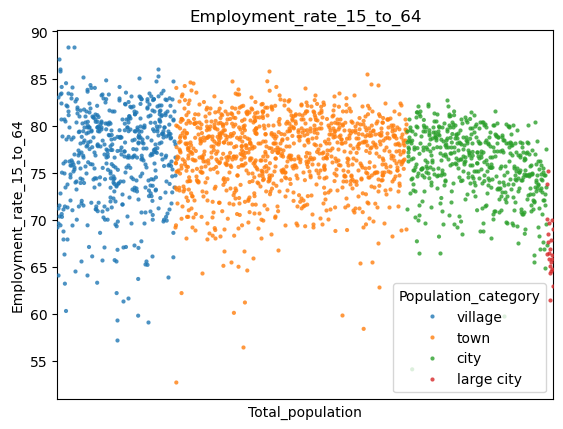

In [ ]:
#Some scatter plots to visualize the diffrences within these categories
print('Employment and labor market')

sns.stripplot(x='Total_population', y='Employment_rate_15_to_64', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Employment_rate_15_to_64')
plt.show()

sns.stripplot(x='Total_population', y='Unemployment_rate_15_and_older', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Unemployment_rate_15_and_older')
plt.show()


sns.stripplot(x='Total_population', y='Share_commuters', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Share Commuters')
plt.show()

In [ ]:
print('Education')

sns.stripplot(x='Total_population', y='Share_secondary', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Share_secondary')
plt.show()

sns.stripplot(x='Total_population', y='Share_tertiary', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Share_tertiary')
plt.show()


In [ ]:
print('Demographics')

sns.stripplot(x='Total_population', y='Average_household_size', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Average_household_size')
plt.show()
      
sns.stripplot(x='Total_population', y='Proportion_65_and_older', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Proportion_65_and_older')
plt.show()

sns.stripplot(x='Total_population', y='Share_non_Austrian_citizens', hue='Population_category', data=AustriaCensus2019, alpha=.8, size=3)
plt.xticks([])
plt.title('Share_non_Austrian_citizens')
plt.show()


Next steps
- How to best divide up the municipalities by size? Is the current system the best?
- Explore variation within villages